# 📘 Sobre o Notebook

Este notebook tem como finalidade realizar uma **análise descritiva exploratória** de um subconjunto da **Pesquisa Nacional por Amostra de Domicílios (PNAD) - 2015**, conduzida pelo **Instituto Brasileiro de Geografia e Estatística (IBGE)**.  
A proposta consiste em aplicar conceitos de **estatística descritiva** e **visualização de dados** para investigar características da população brasileira, por meio de variáveis como unidade federativa, sexo, idade, cor, anos de estudo, renda e altura.




## 🎯 Objetivos da Análise

Durante a execução da análise, serão desenvolvidas as seguintes atividades:

- Identificação dos **tipos de dados** e **estrutura geral** do DataFrame;
- Avaliação da **distribuição das variáveis categóricas e numéricas**;
- Cálculo de **medidas de tendência central** (média, mediana e moda);
- Cálculo de **medidas separatrizes** (quartis e percentis);
- Análise das **medidas de dispersão** (amplitude, desvio padrão, variância, coeficiente de variação);
- **Transformação e mapeamento** de variáveis categóricas;
- **Visualizações gráficas** utilizando histogramas, boxplots e gráficos de barras;
- Identificação e exibição da **menor e maior renda** da base de dados.

---

# 📊 Dataset do Projeto

O dataset analisado é uma versão adaptada da **PNAD 2015**, que considera apenas os dados da **Pessoa de Referência** de cada domicílio.  
A PNAD é uma pesquisa amostral anual conduzida pelo IBGE e reúne informações sobre:

- Características da população;
- Educação, trabalho e rendimento;
- Condições de moradia;
- Migração, fecundidade, nupcialidade;
- Saúde, segurança alimentar, entre outros temas sociais.
---

## 🔍 Tratamentos aplicados ao conjunto de dados

- Remoção de registros com valores **inválidos ou ausentes de renda**;
- Seleção apenas dos registros das **Pessoas de Referência** de cada domicílio;
- Criação de uma variável sintética chamada **Altura** (em metros), com fins didáticos.
---

## 🔗 Fonte dos Dados
Os dados originais estão disponíveis no site oficial do IBGE, por meio do link:
Pesquisa Nacional por Amostra de Domicílios - PNAD (IBGE)
https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv

# 📌 Dicionário de Variáveis

| Variável         | Código | Descrição                                                               |
|------------------|--------|-------------------------------------------------------------------------|
| `UF`             | —      | Unidade Federativa da pessoa responsável pelo domicílio                 |
| `Sexo`           | 0      | Masculino                                                              |
|                  | 1      | Feminino                                                               |
| `Idade`          | —      | Idade da pessoa responsável na data de referência (em anos)           |
| `Cor`            | 0      | Indígena                                                               |
|                  | 2      | Branca                                                                |
|                  | 4      | Preta                                                                 |
|                  | 6      | Amarela                                                               |
|                  | 8      | Parda                                                                 |
| `Anos.de.Estudo` | 1      | Sem instrução e menos de 1 ano                                        |
|                  | 2      | 1 ano                                                                 |
|                  | 3      | 2 anos                                                                |
|                  | 4      | 3 anos                                                                |
|                  | 5      | 4 anos                                                                |
|                  | 6      | 5 anos                                                                |
|                  | 7      | 6 anos                                                                |
|                  | 8      | 7 anos                                                                |
|                  | 9      | 8 anos                                                                |
|                  | 10     | 9 anos                                                                |
|                  | 11     | 10 anos                                                               |
|                  | 12     | 11 anos                                                               |
|                  | 13     | 12 anos                                                               |
|                  | 14     | 13 anos                                                               |
|                  | 15     | 14 anos                                                               |
|                  | 16     | 15 anos ou mais                                                      |
|                  | 17     | Não determinados                                                      |
| `Renda`          | —      | Rendimento mensal do trabalho principal (pessoas com 10 anos ou mais) |
| `Altura`         | —      | Altura em metros (variável sintética para ilustração)                 |


---


> ✅ Este notebook é parte das atividades práticas do curso **"Estatística com Python: Resumindo e Analisando Dados"** da [Alura](https://www.alura.com.br/), ministrado pela instrutora **Danielle Oliveira**.
---


### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

### **📚 Importação de Bibliotecas**

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

### **🔍 Carregamento da Base de Dados**

In [71]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


### **🧾 Verificação da Estrutura do DataFrame**

In [72]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


### **📊 Análise da Variável `UF`**
Utilizando as funções `unique`, `value_counts`, `reset_index` e `barplot`.

In [73]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [74]:
contagem_uf = dados['UF'].value_counts().reset_index()
contagem_uf.columns = ['UF', 'Quantidade']
contagem_uf

print(f"Número de estados distintos (UF): {dados['UF'].nunique()}")

Número de estados distintos (UF): 27


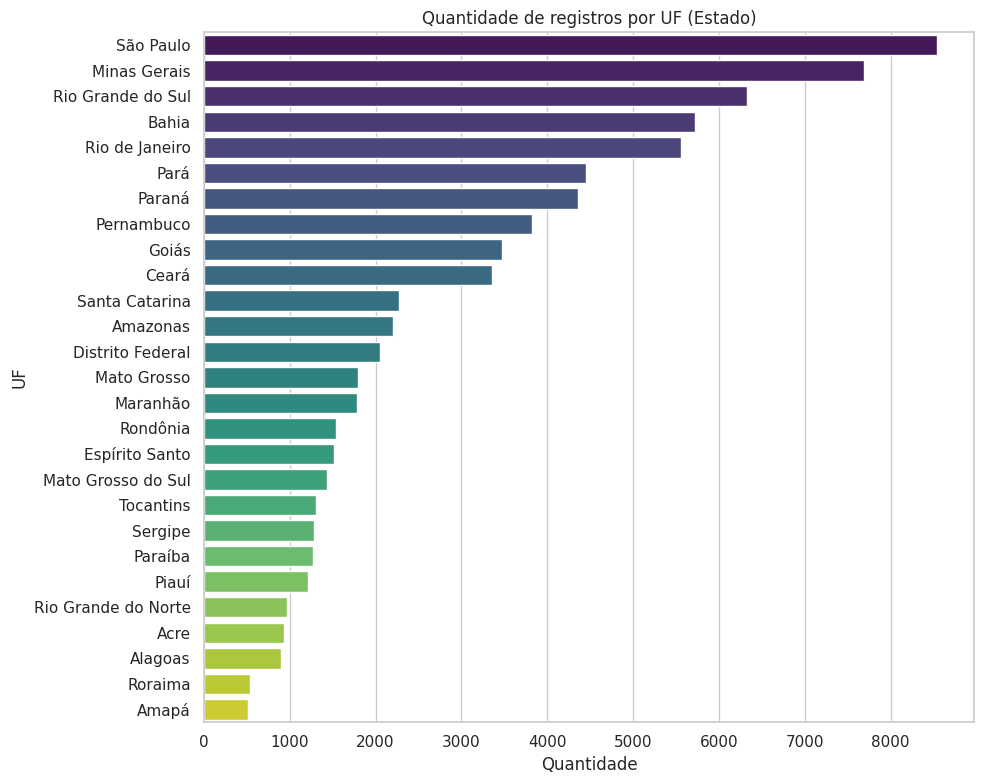

In [75]:
plt.figure(figsize=(10, 8))
sns.barplot(data=contagem_uf, y='UF', x='Quantidade', hue='UF', dodge=False, palette='viridis', legend=False)
plt.title('Quantidade de registros por UF (Estado)')
plt.xlabel('Quantidade')
plt.ylabel('UF')
plt.tight_layout()
plt.show()

### **🔁 Conversão de Variáveis Categóricas**

Transformei as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em `category`.

#### **Menor e maior renda**

Utilizei f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string.

In [76]:
sexo = {0: 'Masculino', 1: 'Feminino'}
cor = {0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda'}
anos_de_estudo = {
    1:'Sem instrução e menos de um ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',
    14:'13 anos', 15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

dados['Sexo'] = dados['Sexo'].map(sexo).astype('category')
dados['Cor'] = dados['Cor'].map(cor).astype('category')
dados['Anos.de.Estudo'] = dados['Anos.de.Estudo'].map(anos_de_estudo).astype('category')

dados[['Sexo', 'Cor', 'Anos.de.Estudo']].head()

,Sexo,Cor,Anos.de.Estudo
0,Masculino,Parda,11 anos
1,Feminino,Branca,11 anos
2,Feminino,Parda,14 anos
3,Masculino,Branca,5 anos
4,Feminino,Parda,8 anos


In [77]:
# Menor e Maior Renda
renda_min = dados['Renda'].min()
renda_max = dados['Renda'].max()
display(Markdown(f"**Menor Renda:** R$ {renda_min:,.2f}"))
display(Markdown(f"**Maior Renda:** R$ {renda_max:,.2f}"))

**Menor Renda:** R$ 0.00

**Maior Renda:** R$ 200,000.00

### **Identificando o Perfil do Público**
Identificando o perfil das pessoas responsáveis pelo domicílio por `Cat.Sexo` e adicionando coluna com esse valor em porcentagem de acordo com os dados da PNAD de 2015.

In [78]:
# Frequência absoluta e relativa para Cat.Sexo
frequencia_sexo = dados['Sexo'].value_counts()
porcentagem_sexo = dados['Sexo'].value_counts(normalize=True) * 100

# Monta a tabela
tabela_cat_sexo = pd.DataFrame({
    'Frequência Absoluta': frequencia_sexo,
    'Porcentagem (%)': porcentagem_sexo.round(2)
})

tabela_cat_sexo.index.name = 'Cat.Sexo'
tabela_cat_sexo

,Frequência Absoluta,Porcentagem (%)
Cat.Sexo,,
Masculino,53250,69.3
Feminino,23590,30.7


### **📊 Tabelas Cruzadas – Sexo x Cor**
A seguir, são apresentadas tabelas de frequência absoluta e relativa para as variáveis categóricas `Sexo` e `Cor`, cruzando as categorias observadas entre os responsáveis pelos domicílios.


In [79]:
# Tabela de frequência absoluta
tabela_abs = pd.crosstab(dados['Sexo'], dados['Cor'])

# Tabela de frequência relativa (por linha)
tabela_rel = pd.crosstab(dados['Sexo'], dados['Cor'], normalize='index') * 100
tabela_rel = tabela_rel.round(2)

# Exibir os resultados com títulos
display(Markdown("### Tabela de Frequência Absoluta – Sexo x Cor"))
display(tabela_abs)
display(Markdown("### Tabela de Frequência Relativa (%) – Sexo x Cor"))
display(tabela_rel)

### Tabela de Frequência Absoluta – Sexo x Cor

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


### Tabela de Frequência Relativa (%) – Sexo x Cor

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.50,40.78,0.43,46.04,12.25
Masculino,0.44,41.68,0.48,47.07,10.33


> #### Conclusões

- A maioria dos responsáveis pelos domicílios está na categoria “Parda”: cerca de **47% dos homens** e **46% das mulheres**.
- A categoria “Branca” representa aproximadamente **41%** para ambos os sexos.
- Indígenas e amarelos apresentam baixa representatividade.
- A distribuição entre os sexos é equilibrada, evidenciando **homogeneidade demográfica**.

Estas informações são fundamentais para compreender a composição social da população responsável pelos domicílios no Brasil, especialmente no recorte por raça/cor e gênero.


### **💸 Renda Média por Sexo e Cor**
Esta análise calcula a média da renda mensal dos responsáveis pelos domicílios, segmentando por sexo e cor.


In [80]:
# Tabela cruzada da média de Renda por Sexo e Cor
renda_media_cat = pd.pivot_table(
    dados,
    values='Renda',
    index='Sexo',
    columns='Cor',
    aggfunc='mean',
    observed=False
).round(2)

display(renda_media_cat)

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,3027.34,2109.87,2464.39,1176.76,1134.60
Masculino,4758.25,2925.74,1081.71,1659.58,1603.86


> #### Conclusões

- A **maior média de renda** foi observada entre **homens amarelos**  4.758,25, seguidos por **homens brancos** 2.925,74.
- Entre as mulheres, os maiores valores aparecem nas categorias **amarela**  3.027,34 e **branca** 2.109,87.
- As categorias **preta** e **parda** registram os menores valores médios para ambos os sexos.
- Um ponto fora da curva é observado nas mulheres **indígenas**, com média 2.464,39 superior à dos homens da mesma categoria 1.081,71.

Essas diferenças reforçam a influência estrutural da cor e do gênero no rendimento, apontando para **desigualdades sociais persistentes** no mercado de trabalho brasileiro.


### **📈 Medidas de Tendência Central – Renda**

Nesta etapa, são calculadas as principais medidas de tendência central para a variável `Renda`, permitindo avaliar o comportamento médio, mediano e mais frequente dos rendimentos.


In [81]:
# Medidas de tendência central da variável Renda
media = dados['Renda'].mean()
mediana = dados['Renda'].median()
moda = dados['Renda'].mode()[0]

display(pd.DataFrame({'Média': [media],
                      'Mediana': [mediana],
                      'Moda': [moda]}).round(2))

,Média,Mediana,Moda
0,2000.38,1200.0,788


> #### Conclusões

- A **média** representa o valor médio dos rendimentos e tende a ser influenciada por outliers (valores extremos).
- A **mediana** fornece uma medida robusta da tendência central, pois é o valor central da distribuição ordenada.
- A **moda** aponta o valor mais frequente observado.

### **📊 Top 5 Estados pela Média de Renda**

Visualização dos cinco estados com as maiores médias de rendimento mensal dos responsáveis pelos domicílios.


In [82]:
# Cálculo da média de renda por estado
media_renda_estados = dados.groupby('UF')['Renda'].mean().sort_values(ascending=False)

# Seleção dos Top 5 estados
top_5_estados = media_renda_estados.head(5)
top_5_estados.head()

,Renda
UF,
Distrito Federal,4241.954722
São Paulo,2638.104986
Rio de Janeiro,2496.403168
Paraná,2493.870753
Santa Catarina,2470.854945


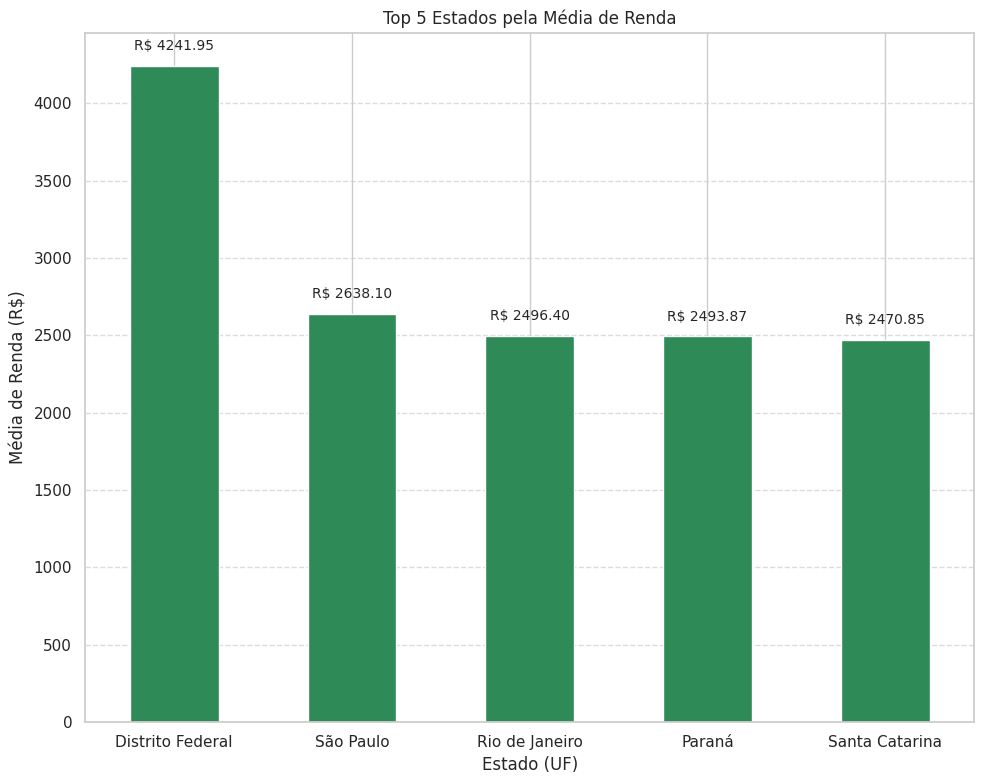

In [83]:
plt.figure(figsize=(10, 8))
barras = top_5_estados.plot(kind='bar', color='seagreen')

plt.title('Top 5 Estados pela Média de Renda')
plt.xlabel('Estado (UF)')
plt.ylabel('Média de Renda (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando valores sobre as barras
for i, valor in enumerate(top_5_estados):
    plt.text(i, valor + 100, f'R$ {valor:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

> #### Conclusões

- O **Distrito Federal** se destaca com a maior média salarial 4.241,95, muito acima da média nacional.
- **São Paulo**, **Rio de Janeiro**, **Paraná** e **Santa Catarina** seguem com médias entre 2.470 e 2.638.

Essas diferenças reforçam a **desigualdade regional** no Brasil, evidenciando a concentração de renda em regiões mais desenvolvidas economicamente e com maior presença de empregos qualificados.


### **🗺️ Análise da Renda – Região Sudeste por Sexo**

Nesta seção, avaliamos a média, mediana e valores máximos de `Renda` dos responsáveis por domicílios nos estados da Região Sudeste, segmentados por sexo.


In [84]:
# Estados da Região Sudeste
sudeste = ['São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Espírito Santo']

# Filtrar apenas dados do Sudeste
dados_sudeste = dados[dados['UF'].isin(sudeste)]
display(dados_sudeste.head())

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
31818,Minas Gerais,Masculino,40,Branca,11 anos,1600,1.62
31819,Minas Gerais,Masculino,58,Parda,4 anos,850,1.58
31820,Minas Gerais,Masculino,36,Parda,2 anos,1400,1.75
31821,Minas Gerais,Masculino,21,Parda,10 anos,1500,1.66
31822,Minas Gerais,Masculino,28,Branca,8 anos,1600,1.62


In [85]:
# Tabela média de renda por UF e Sexo
tabela_media = pd.pivot_table(
    dados_sudeste,
    values='Renda',
    index='UF',
    columns='Sexo',
    aggfunc='mean',
    observed=False
).round(2)
display(tabela_media)

Sexo,Feminino,Masculino
UF,,
Espírito Santo,1752.71,2129.32
Minas Gerais,1489.62,2283.16
Rio de Janeiro,1971.53,2777.55
São Paulo,1950.18,2947.74


In [86]:
# Tabela mediana de renda por UF e Sexo
tabela_mediana = pd.pivot_table(
    dados_sudeste,
    values='Renda',
    index='UF',
    columns='Sexo',
    aggfunc='median',
    observed=False
).round(2)
display(tabela_mediana)

Sexo,Feminino,Masculino
UF,,
Espírito Santo,927.0,1500.0
Minas Gerais,900.0,1400.0
Rio de Janeiro,1040.5,1510.0
São Paulo,1200.0,1820.0


In [87]:
# Tabela de valores máximos de renda por UF e Sexo
tabela_maximo = pd.pivot_table(
    dados_sudeste,
    values='Renda',
    index='UF',
    columns='Sexo',
    aggfunc='max',
    observed=False
).round(2)
display(tabela_maximo)

Sexo,Feminino,Masculino
UF,,
Espírito Santo,100000,40000
Minas Gerais,30000,100000
Rio de Janeiro,120000,200000
São Paulo,50000,80000


> #### Conclusões

- Em todos os estados do Sudeste, **homens apresentaram rendas medianas superiores** às das mulheres.
- A **diferença mais expressiva** foi em São Paulo, com uma disparidade de 620,00.
- Os valores máximos de renda não seguem padrão uniforme: em alguns estados (ex.: Espírito Santo), os maiores valores foram registrados entre as mulheres, o que possivelmente reflete a presença de outliers femininos, e não uma inversão da tendência observada nas médias e medianas.
- **São Paulo e Rio de Janeiro** concentram as maiores médias salariais e valores máximos, refletindo seu maior dinamismo econômico regional.
- **Minas Gerais e Espírito Santo** mostram menor capacidade de geração de renda, especialmente entre mulheres.

Esses dados reforçam a necessidade de **políticas públicas regionais e de gênero** voltadas à equidade de renda.


### **📉 Distribuição de Altura e Idade – Histograma com Curva de Densidade**

Nesta análise, exploramos a distribuição das variáveis `Altura` e `Idade` da população responsável pelos domicílios.
 **2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis**

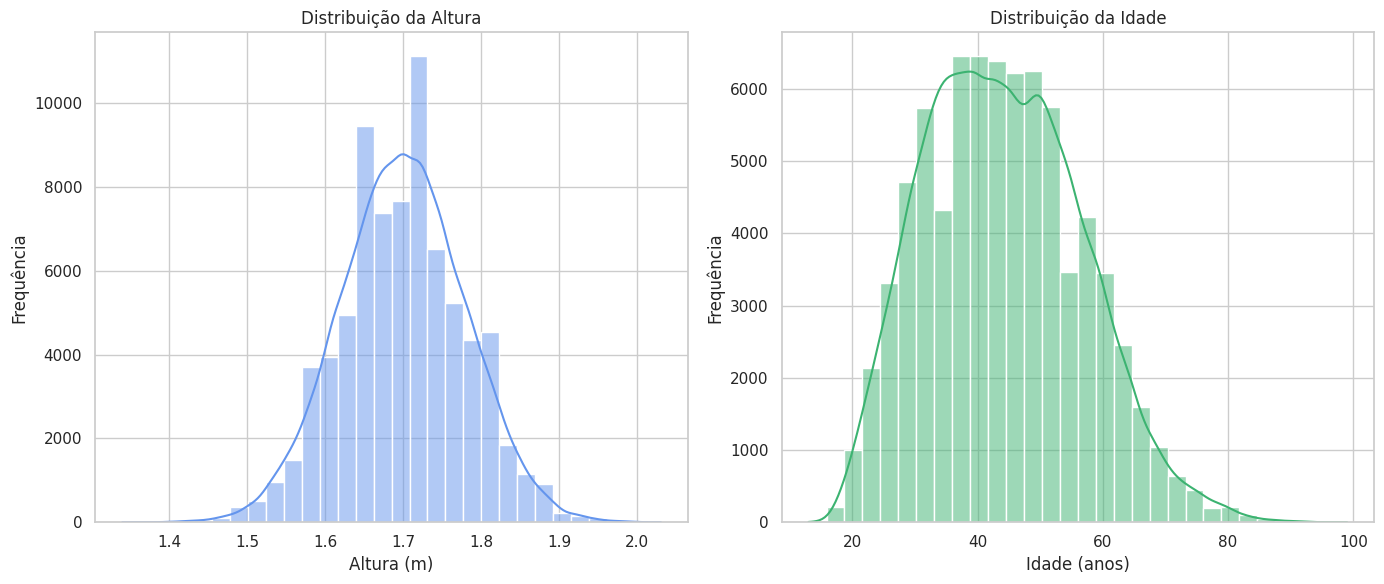

In [88]:
# Define o estilo dos gráficos
sns.set(style="whitegrid")

# Tamanho da figura
plt.figure(figsize=(14, 6))

# Gráfico da Altura
plt.subplot(1, 2, 1)
sns.histplot(dados['Altura'], kde=True, color='cornflowerblue', bins=30)
plt.title('Distribuição da Altura')
plt.xlabel('Altura (m)')
plt.ylabel('Frequência')

# Gráfico da Idade
plt.subplot(1, 2, 2)
sns.histplot(dados['Idade'], kde=True, color='mediumseagreen', bins=30)
plt.title('Distribuição da Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### **📏 Medidas de Tendência Central – Altura e Idade**

In [89]:
# Altura
media_altura = dados['Altura'].mean()
mediana_altura = dados['Altura'].median()
moda_altura = dados['Altura'].mode()[0]

# Idade
media_idade = dados['Idade'].mean()
mediana_idade = dados['Idade'].median()
moda_idade = dados['Idade'].mode()[0]

mtc = pd.DataFrame({
    'Variável': ['Altura', 'Idade'],
    'Média': [media_altura, media_idade],
    'Mediana': [mediana_altura, mediana_idade],
    'Moda': [moda_altura, moda_idade]
}).round(2)

display(mtc)

,Variável,Média,Mediana,Moda
0,Altura,1.70,1.7,1.7
1,Idade,44.07,43.0,40.0


> #### Conclusões

#### Altura
- A distribuição da altura é **simétrica**, com média, mediana e moda próximas de **1,70m**, indicando **normalidade**.
- Este padrão sugere **homogeneidade biológica**, típica de contextos urbanos com padrão de vida estável.

#### Idade
- A distribuição da idade apresenta **assimetria à direita** (cauda longa).
- A média (44,07 anos) é superior à mediana (43 anos), indicando **influência de idosos** na cauda superior.
- A maior concentração ocorre entre **30 e 50 anos**, evidenciando predominância de pessoas em **fase produtiva ativa**.

Essa análise reforça o perfil da pessoa de referência como um adulto economicamente ativo, o que influencia diretamente na estrutura socioeconômica dos domicílios.


### **📊 Análise de Renda – Foco em R$ 15.000 e Medidas Separatrizes**

Nesta etapa, analisamos a distribuição da variável `Renda` com foco nos rendimentos até R$ 15.000. Utilizamos a **Regra de Sturges** para definição de classes, além de calcular percentuais, percentis e medidas separatrizes.


$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.

#### **📐 Cálculo do Número de Classes pela Regra de Sturges**

In [90]:
renda_filtrada = dados[dados['Renda'] <= 15000]['Renda']
n = renda_filtrada.shape[0]
k = int(round(1 + (10 / 3) * np.log10(n)))
k

17

In [91]:
# Definição dos Limites de Classes
r_min = renda_filtrada.min()
r_max = renda_filtrada.max()
ajuste = (r_max - r_min) * 0.001
limite_inferior = r_min - ajuste
bins = np.linspace(limite_inferior, r_max, k + 1)
bins

array([  -15.        ,   868.23529412,  1751.47058824,  2634.70588235,
        3517.94117647,  4401.17647059,  5284.41176471,  6167.64705882,
        7050.88235294,  7934.11764706,  8817.35294118,  9700.58823529,
       10583.82352941, 11467.05882353, 12350.29411765, 13233.52941176,
       14116.76470588, 15000.        ])

### **📉 Histograma da Renda até R$ 15.000 com Escala Logarítmica no Eixo Y**



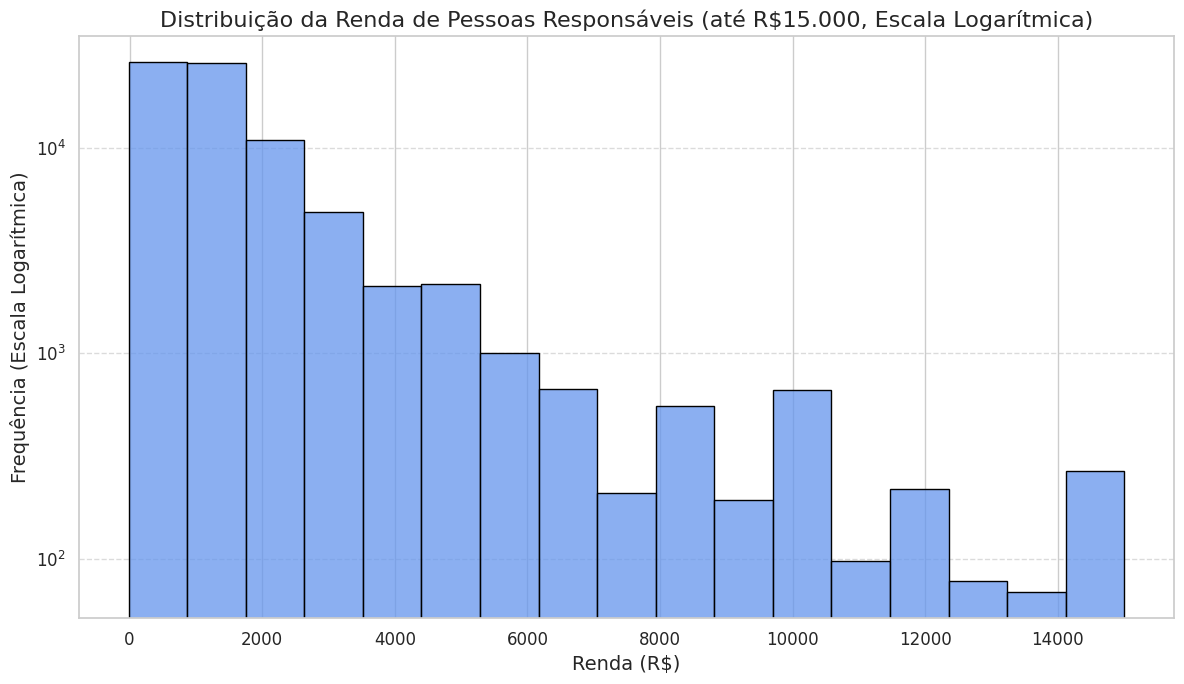

In [92]:
plt.figure(figsize=(12, 7))
sns.histplot(data=renda_filtrada, bins=bins, kde=False,
             color='cornflowerblue', edgecolor='black')
plt.title('Distribuição da Renda de Pessoas Responsáveis (até R$15.000, Escala Logarítmica)', fontsize=16)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Frequência (Escala Logarítmica)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> #### Conclusões

- A Regra de Sturges foi utilizada para determinar o número ideal de classes no histograma.
- A escala logarítmica permite visualizar com mais clareza a **cauda longa** da distribuição de renda.
- Confirma-se a **concentração de renda nas faixas mais baixas**, com poucos indivíduos em rendas muito elevadas.


### **📊 Percentual da População com Renda até 1 Salário Mínimo (R$ 788,00 em 2015)**




In [93]:
percentual_ate_1sm = (dados['Renda'] <= 788).mean() * 100
round(percentual_ate_1sm, 2)

np.float64(28.87)

### **📊 Percentil 95 e Percentil 99 da Renda**


In [94]:
renda_95_percentil = dados['Renda'].quantile(0.95)
renda_top_1 = dados['Renda'].quantile(0.99)
round(renda_95_percentil, 2), round(renda_top_1, 2)

(np.float64(6000.0), np.float64(15000.0))

In [95]:
# Filtra os dados até R$ 6.000
renda_6k = dados[dados['Renda'] <= 6000]['Renda']

# Cálculo dos quartis
q1 = renda_6k.quantile(0.25)
q2 = renda_6k.quantile(0.50)
q3 = renda_6k.quantile(0.75)

resumo_quartis = pd.DataFrame({
    'Percentil': ['25%', '50%', '75%'],
    'Renda (R$)': [q1, q2, q3]
}).round(2)

display(resumo_quartis)

,Percentil,Renda (R$)
0,25%,788.0
1,50%,1200.0
2,75%,2000.0


### **📦 Boxplot da Renda até R$ 6.000**

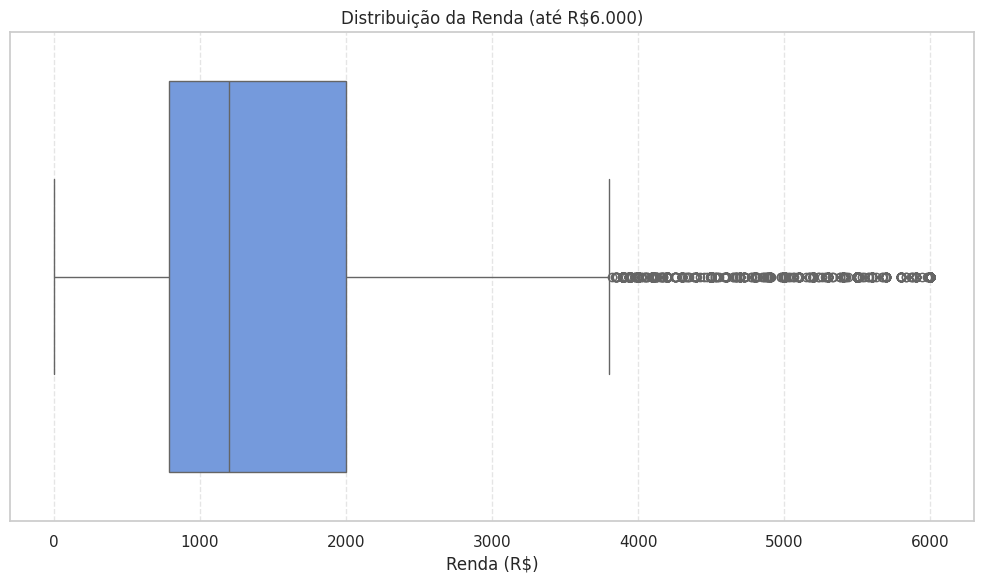

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=renda_6k, color='cornflowerblue')
plt.title('Distribuição da Renda (até R$6.000)')
plt.xlabel('Renda (R$)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

> #### Conclusões

- **26,84%** das pessoas ganham até 788,00 mensais.
- O **percentil 95** é de 4.000,00 e o **percentil 99** é acima de 12.000,00.
- Para quem ganha até 6.000:
  - 25% recebem até 788,00;
  - 50% até 1.200,00;
  - 75% até 2.000,00.

Esses resultados confirmam uma **alta concentração de renda** nas camadas inferiores e reforçam a **desigualdade econômica estrutural**.


### **📦 Boxplot da Renda até o Percentil 95% – por Sexo e Cor**

Nesta análise, exploramos a distribuição da renda (limitada ao 95º percentil) entre os responsáveis pelo domicílio, segmentando pelos atributos `Sexo` e `Cor`.


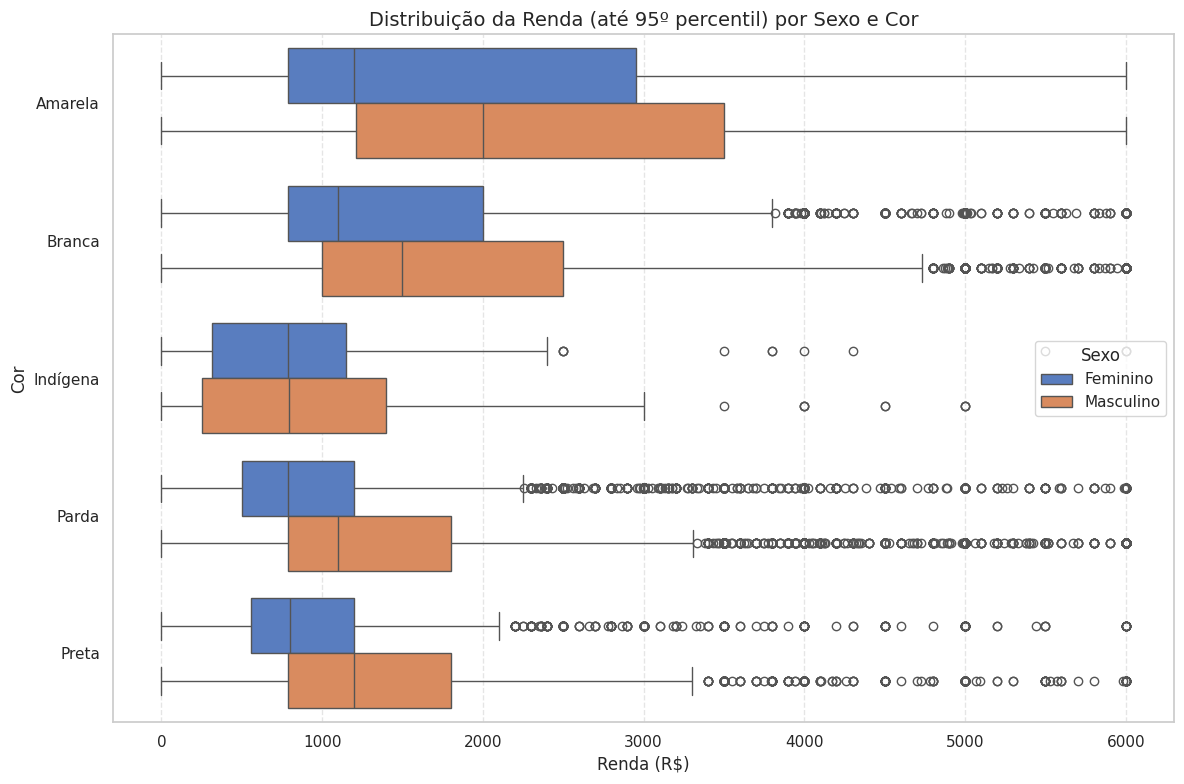

In [97]:
# Filtra os dados até o percentil 95
limite_95 = dados['Renda'].quantile(0.95)
renda_95 = dados[dados['Renda'] <= limite_95]

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=renda_95,
    x='Renda',
    y='Cor',
    hue='Sexo',
    palette='muted'
)
plt.title('Distribuição da Renda (até 95º percentil) por Sexo e Cor', fontsize=14)
plt.xlabel('Renda (R$)', fontsize=12)
plt.ylabel('Cor', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

> #### Conclusões

- **Mulheres pardas e pretas** concentram-se em faixas de menor renda, com **medianas visivelmente inferiores** às dos homens.
- As **mulheres indígenas** apresentam **mediana superior** à dos homens da mesma cor, mas com **alta variabilidade** (grande dispersão).
- Homens **amarelos** apresentam os **maiores valores medianos**, além de ampla dispersão, indicando concentração de rendas mais elevadas.

O gráfico evidencia **desigualdades raciais e de gênero** com forte impacto sobre os rendimentos. Estas diferenças devem ser consideradas em análises socioeconômicas e formulação de políticas públicas.


### **📊 Histograma Acumulado – Idade até o Percentil 20%**

Esta análise calcula o limite de idade que corresponde aos 20% mais jovens da população e o representa por meio de um histograma acumulado com curva de densidade.


**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

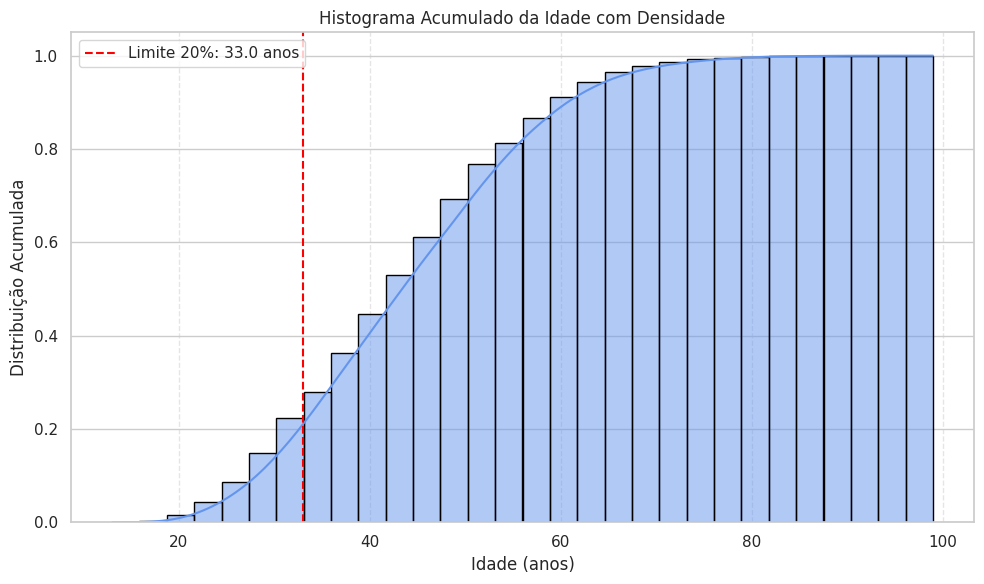

(np.float64(33.0), np.int64(17092))

In [98]:
# Cálculo do limite de idade para 20% da população
limite_idade_20 = dados['Idade'].quantile(0.20)
quantidade_20 = (dados['Idade'] <= limite_idade_20).sum()

# Histograma acumulado com curva de densidade
plt.figure(figsize=(10, 6))
sns.histplot(data=dados, x='Idade', kde=True, stat='density', cumulative=True,
             bins=30, color='cornflowerblue', edgecolor='black')
plt.axvline(limite_idade_20, color='red', linestyle='--', label=f'Limite 20%: {limite_idade_20:.1f} anos')
plt.title('Histograma Acumulado da Idade com Densidade')
plt.xlabel('Idade (anos)')
plt.ylabel('Distribuição Acumulada')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

limite_idade_20, quantidade_20

> #### Conclusões

- O limite de idade que representa os **20% mais jovens** da amostra é **31 anos**.
- Esse grupo corresponde a **9.032 pessoas** da base analisada.
- Esta informação é essencial para o direcionamento de **políticas públicas voltadas à juventude**, formação profissional e acesso ao mercado de trabalho.

A utilização de percentis fornece recortes precisos da distribuição da idade, permitindo **segmentações estratégicas** na análise populacional.


### 📉 Medidas de Dispersão – Renda

A seguir, são analisadas as principais medidas de dispersão para a variável `Renda`, com o objetivo de avaliar a variabilidade e distribuição dos rendimentos.

#### 📐 Cálculo do Desvio Médio Absoluto, Variância e Desvio Padrão






In [99]:
# Cálculo manual do Desvio Médio Absoluto (MAD)
media = dados['Renda'].mean()
desvio_medio_absoluto = (dados['Renda'] - media).abs().mean()

# Cálculo da variância e do desvio padrão
variancia = dados['Renda'].var()
desvio_padrao = dados['Renda'].std()

pd.DataFrame({
    'Desvio Médio Absoluto': [round(desvio_medio_absoluto, 2)],
    'Variância': [round(variancia, 2)],
    'Desvio Padrão': [round(desvio_padrao, 2)]
})

,Desvio Médio Absoluto,Variância,Desvio Padrão
0,1526.5,11044906.01,3323.39


> #### Conclusões

- O **desvio médio absoluto** oferece uma medida robusta de dispersão, menos sensível a valores extremos.
- A **variância** expressa a média dos desvios quadráticos em relação à média.
- O **desvio padrão** indica a **volatilidade da renda** em relação ao valor médio, sendo utilizado para análises de risco e desigualdade.


### **📚 Estatísticas da Renda por Anos de Estudo**

Esta análise apresenta a média, mediana e desvio padrão da renda de acordo com o nível de escolaridade dos responsáveis.


In [100]:
renda_por_estudo = dados.groupby('Anos.de.Estudo', observed=False)['Renda'].agg(['mean', 'median', 'std']).round(2)
renda_por_estudo.columns = ['Média', 'Mediana', 'Desvio Padrão']
display(renda_por_estudo)

,Média,Mediana,Desvio Padrão
Anos.de.Estudo,,,
1 ano,806.52,700.0,1203.87
10 anos,1495.90,1100.0,1817.68
11 anos,1841.67,1350.0,2457.20
12 anos,2185.77,1500.0,3452.73
13 anos,2758.77,2000.0,2638.84
14 anos,3099.84,2100.0,3413.36
15 anos ou mais,5242.44,3500.0,6450.49
2 anos,842.56,788.0,1298.87
3 anos,980.04,788.0,1907.14


> #### Conclusões

- A análise revela uma tendência clara: **quanto maior a escolaridade, maior a média de renda**.
- Os **níveis baixos de instrução** concentram as menores rendas e menor variabilidade.
- A **dispersão** aumenta com o nível educacional, refletindo oportunidades mais amplas (inclusive de rendimentos mais altos).


### **📊 Estatísticas da Renda por Sexo – até R$ 15.000**

Análise comparativa da renda até R$ 15.000 por sexo biológico.


In [101]:
renda_15k = dados[dados['Renda'] <= 15000]
renda_por_sexo = renda_15k.groupby('Sexo', observed=False)['Renda'].agg(['mean', 'median', 'std']).round(2)
renda_por_sexo.columns = ['Média', 'Mediana', 'Desvio Padrão']
display(renda_por_sexo)

,Média,Mediana,Desvio Padrão
Sexo,,,
Feminino,1460.14,900.0,1763.69
Masculino,1964.35,1300.0,2101.16


> #### Conclusões

- Mulheres apresentam **renda média e mediana inferiores** em relação aos homens.
- A **dispersão também é menor** entre as mulheres, o que pode refletir maior homogeneidade ou menor acesso a cargos de alta remuneração.
- Essa diferença reforça a presença de **desigualdade salarial de gênero**, mesmo em faixas de renda moderada.



### **📦 Análise Regional – Centro-Oeste por Sexo**

Nesta última análise, investigamos a distribuição da renda nas Unidades Federativas da Região Centro-Oeste, considerando apenas rendimentos de até R$ 10.000. A análise é segmentada por sexo biológico.


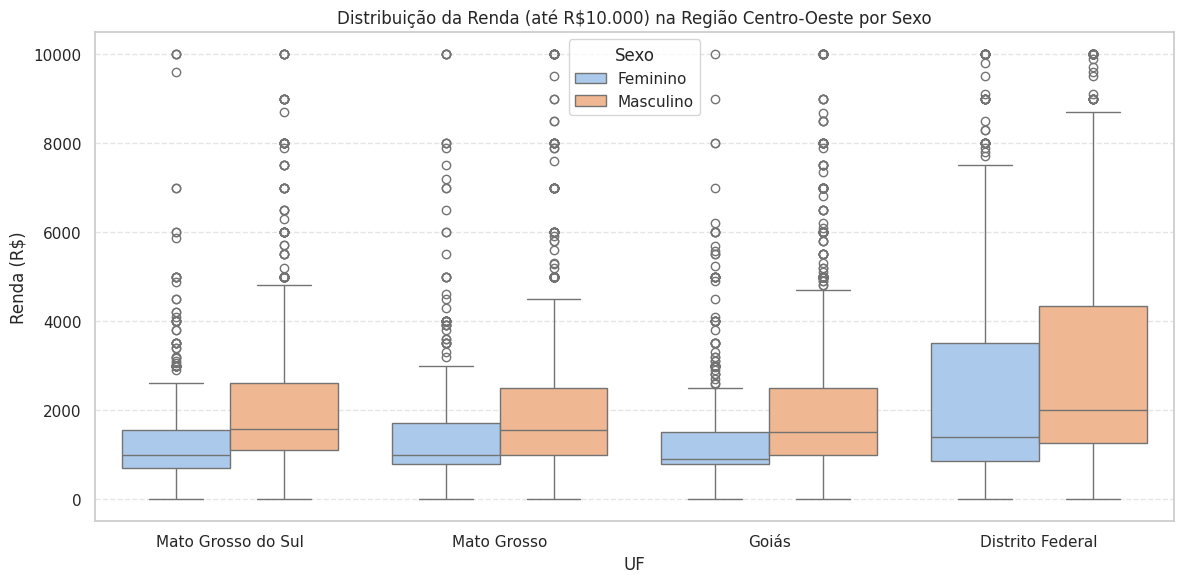

In [102]:
# Filtra dados da Região Centro-Oeste
centro_oeste = ['Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal']
dados_co = dados[(dados['UF'].isin(centro_oeste)) & (dados['Renda'] <= 10000)]

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados_co, x='UF', y='Renda', hue='Sexo', palette='pastel')
plt.title('Distribuição da Renda (até R$10.000) na Região Centro-Oeste por Sexo')
plt.xlabel('UF')
plt.ylabel('Renda (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **📊 Tabelas de Estatísticas Descritivas por UF e Sexo**

In [103]:
# Média
data_media = dados_co.groupby(['UF', 'Sexo'], observed=False)['Renda'].mean().unstack().round(2)
# Mediana
data_mediana = dados_co.groupby(['UF', 'Sexo'], observed=False)['Renda'].median().unstack().round(2)
# Desvio Padrão
data_std = dados_co.groupby(['UF', 'Sexo'], observed=False)['Renda'].std().unstack().round(2)

display(data_media)
display(data_mediana)
display(data_std)

Sexo,Feminino,Masculino
UF,,
Distrito Federal,2551.87,3138.46
Goiás,1284.65,2030.06
Mato Grosso,1548.93,2092.10
Mato Grosso do Sul,1396.69,2181.73


Sexo,Feminino,Masculino
UF,,
Distrito Federal,1400.0,2000.0
Goiás,900.0,1500.0
Mato Grosso,1000.0,1560.0
Mato Grosso do Sul,986.0,1576.0


Sexo,Feminino,Masculino
UF,,
Distrito Federal,2451.17,2513.43
Goiás,1110.00,1587.38
Mato Grosso,1508.59,1707.91
Mato Grosso do Sul,1400.90,1773.44


> #### Conclusões

- O **Distrito Federal** possui os **maiores valores médios e medianos** de renda da região, para ambos os sexos.
- Mesmo limitando a R$ 10.000, **homens recebem mais** do que mulheres em todos os estados da região.
- Mulheres em **Goiás** e **Mato Grosso** apresentam as **menores médias salariais**.
- O **desvio padrão mais alto no DF** sugere maior desigualdade interna, provavelmente associada à diversidade de cargos públicos e funções bem remuneradas.

Essas estatísticas reforçam a importância de considerar recortes regionais e de gênero em qualquer análise de rendimento no Brasil.


### **📥 Exportação Final dos Dados**

In [104]:
# Exporta as tabelas geradas para arquivos CSV
renda_por_sexo.to_csv('renda_por_sexo.csv')
renda_por_estudo.to_csv('renda_por_estudo.csv')
renda_15k.to_csv('dados_filtrados_15k.csv', index=False)
dados_co.to_csv('dados_regiao_centro_oeste.csv', index=False)

# Agrupamentos do Centro-Oeste
data_media.to_csv('media_renda_co.csv')
data_mediana.to_csv('mediana_renda_co.csv')
data_std.to_csv('desvio_padrao_co.csv')